# Overview
In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.



Columns explanation : 

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account 
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user 
PAYMENTS: Amount of Payment done by user 

Instructions

1. Import you data and perform basic data exploration phase

2. Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )

3. Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

4. Perform partitional clustering using the K-means algorithm. Then, plot the clusters

5. Find the best k value and plot the clusters again.

6. Interpret the results

# Import necessary libraries and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler, LabelEncoder
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
credit_df = pd.read_csv('Credit_card_dataset.csv')
credit_df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


# check for missing values

In [3]:
#check for missing values/null values
credit_df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [4]:
# change column names to lower case for better readability
credit_df.columns = credit_df.columns.str.lower()

In [5]:
credit_df.credit_limit

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: credit_limit, Length: 8950, dtype: float64

In [6]:
# check the row with the missing value in credit limit column
null_mask = credit_df.credit_limit.isnull()
null_rows = credit_df[null_mask]
null_rows

,cust_id,balance_frequency,purchases,payments,credit_limit,cash_advance
5203,C15349,0.166667,0.0,9.040017,NaN,186.853063


In [7]:
# find the mean or median and replace the missing value
mean_credit_limit = credit_df.credit_limit.mean().round(0)
mean_credit_limit

np.float64(4494.0)

In [8]:
# check the median value for the credit limit column
median_credit_limit = credit_df.credit_limit.median().round(0)
median_credit_limit

np.float64(3000.0)

In [9]:
# fill the missing value with the median
credit_df['credit_limit'] = credit_df['credit_limit'].fillna(median_credit_limit)

In [10]:
#check the missing value has been filled
credit_df.isnull().sum()

cust_id              0
balance_frequency    0
purchases            0
payments             0
credit_limit         0
cash_advance         0
dtype: int64

# Feature Selection

In [11]:
# drop unnecessary columns such as the customer ID
new_df = credit_df.drop(['cust_id', 'balance_frequency', 'cash_advance','payments',], axis=1)
new_df

,purchases,credit_limit
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


<Axes: >

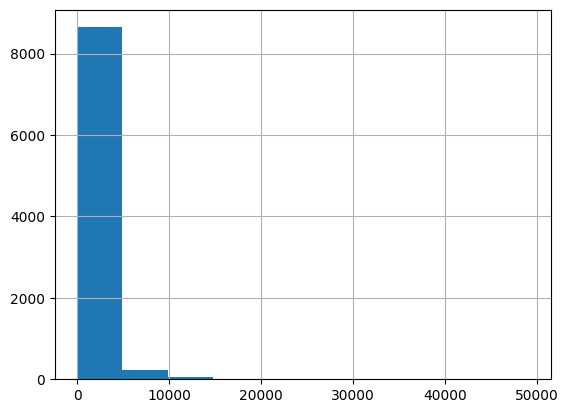

In [12]:
# checking the distribution of purchases
new_df['purchases'].hist()

<Axes: >

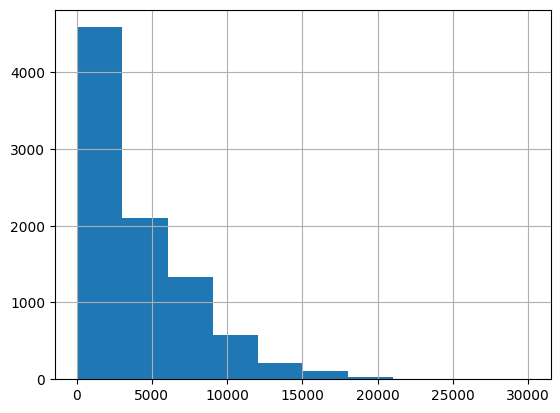

In [13]:
# checking the distribution of purchases
new_df['credit_limit'].hist()

# Hierarchical clustering

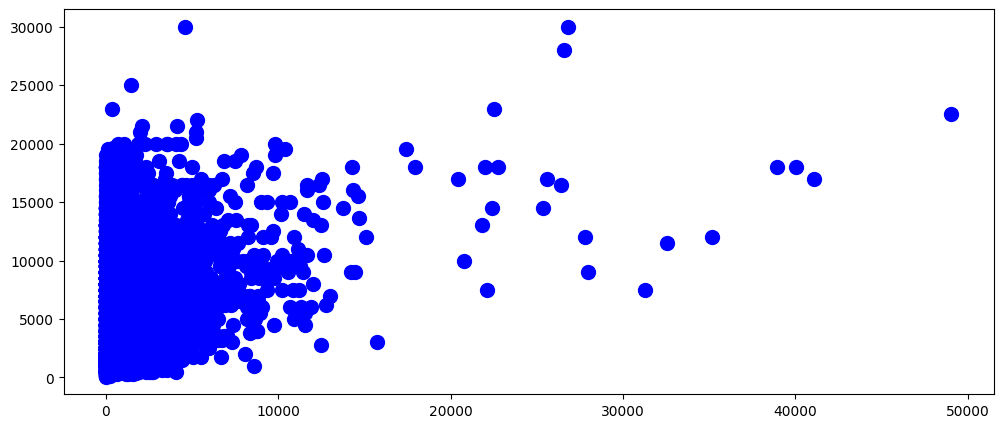

In [14]:
# scatter plot 
plt.figure(figsize =(12,5))
plt.scatter(new_df['purchases'], new_df['credit_limit'], s=100, c='blue')


### Use a dendogram to know how many clusters we need

In [15]:
# standardization of our data
data_scaled = normalize(new_df)
data_scaled = pd.DataFrame(data_scaled, columns=new_df.columns)
data_scaled.head()

,purchases,credit_limit
0,0.094969,0.995480
1,0.000000,1.000000
2,0.102546,0.994728
3,0.195990,0.980606
4,0.013332,0.999911


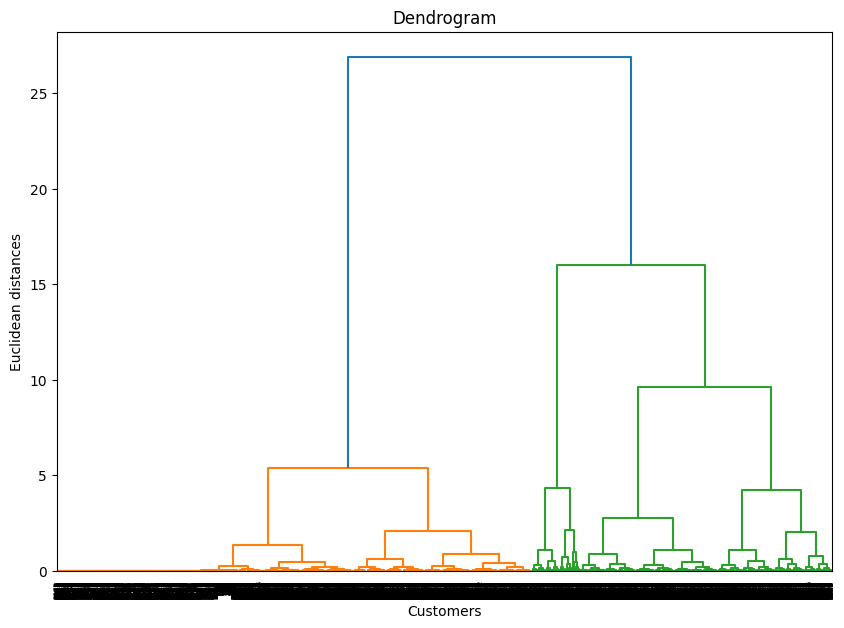

In [16]:
# Visualizing the dendrogram
#plt.figure(figsize=(10,7))

#dendogram=shc.dendrogram(shc.linkage(data_scaled, method='ward'))
#plt.title('Dendrogram')
#plt.xlabel('Customers')
#plt.ylabel('Euclidean distances')
#plt.savefig('credir_card_dendrogram.png')
#plt.show()

In [17]:
# fitting our data in Agglomerative clustering
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
clust_labels = clustering_model.fit_predict(data_scaled)

In [18]:
# check the nummber of clust labels
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,2
4,2
...,...
8945,2
8946,2
8947,2
8948,2


Text(0.5, 1.0, 'Labeled Customer Data')

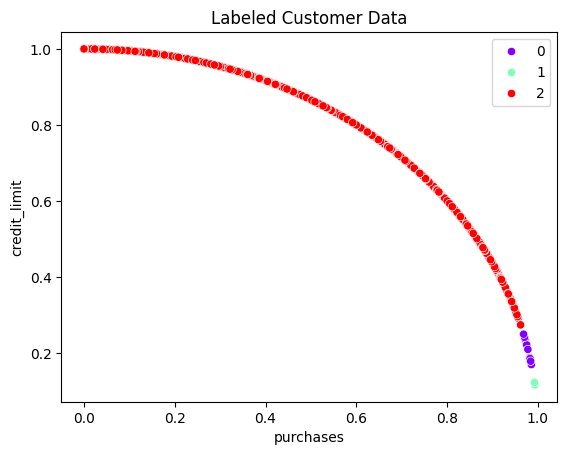

In [19]:
data_labels = clustering_model.labels_
sns.scatterplot(x='purchases',  y='credit_limit', 
                data=data_scaled,  hue=data_labels, palette="rainbow").set_title('Labeled Customer Data')

In [20]:
# evaluating the model
silhouette = silhouette_score(data_scaled, clust_labels )

In [21]:
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.7120154810651925


# Partional clustering using K-means algorithm

In [22]:
# standardizing the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)

## finding optimal k values

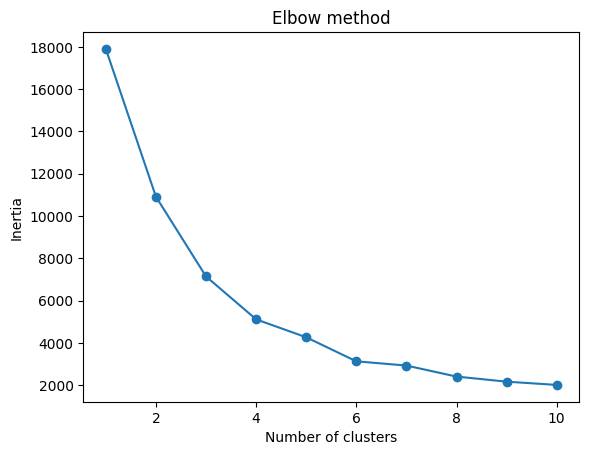

In [23]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Credit Card Elbow Method')
plt.show()


# Applying K-means clustering

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
kmeans

KMeans(n_clusters=3)

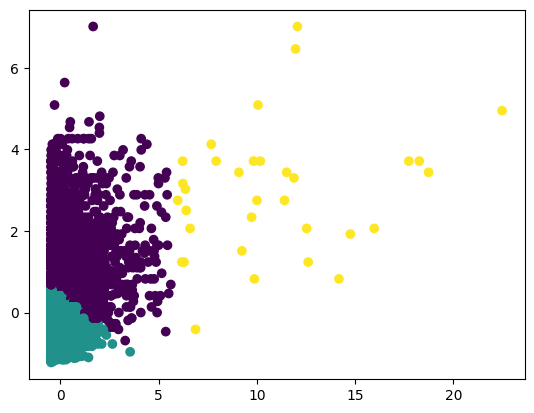

In [28]:
# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=new_df.columns)


# visualize the kmeans results using scatter plot
plt.scatter(x=scaled_df['purchases'], y=scaled_df['credit_limit'], c=kmeans.labels_)
plt.savefig('Credit card cluster groups.png')
plt.show()

In [29]:
score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5556927489311984


# Results interpretation

KMeans Silhouette Score: 0.5555
This score indicates that KMeans has formed reasonably well-separated clusters. A score around 0.55 suggests that while most points are close to their cluster centers, there could be some overlap or confusion between clusters, or some points may not fit as well within their assigned cluster.

Hierarchical Clustering Silhouette Score: 0.7120
This is a higher silhouette score, meaning that the hierarchical clustering model has formed more distinct and better-separated clusters compared to KMeans. A score above 0.7 suggests strong and well-defined clusters, where most data points are closer to their own cluster than to any other clusters.

Comparison
The higher silhouette score (0.712) from hierarchical clustering suggests it provides a better-defined clustering structure for your dataset than KMeans. The clusters are more distinct, and the data points are more compact within their respective clusters.

The KMeans score (0.555) is decent but indicates that there may be some overlap or misclassification of points across clusters, resulting in less distinct clusters.